In [207]:
import Monatsbilanzierung
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

### Versuch 1: Alles random

In [10]:
ergebnisse_heizwärmebedarf = []
for i in range(1000):
	geschossanzahl = np.random.randint(1,20)
	geschosshöhe = 2.9
	gebäudelänge = np.random.randint(20,50)
	gebäudebreite = np.random.randint(20,50)
	wandfläche_nord_süd = gebäudelänge * geschosshöhe * geschossanzahl
	wandfläche_ost_west = gebäudebreite * geschosshöhe * geschossanzahl

	dach = Bilanz_5.Dach(name="Dach1", fläche=(gebäudebreite*gebäudelänge))
	wand1 = Bilanz_5.Außenwand("Wand1", (wandfläche_nord_süd),0)
	wand2 = Bilanz_5.Außenwand("Wand2", (wandfläche_ost_west),90)
	wand3 = Bilanz_5.Außenwand("Wand3", (wandfläche_nord_süd),180)
	wand4 = Bilanz_5.Außenwand("Wand4", (wandfläche_ost_west),270)
	fst1 = Bilanz_5.Fenster("Fenster1", (wandfläche_nord_süd*np.random.uniform(0.1,0.45)), 0)
	fst2 = Bilanz_5.Fenster("Fenster2", (wandfläche_ost_west*np.random.uniform(0.1,0.45)), 90)
	fst3 = Bilanz_5.Fenster("Fenster3", (wandfläche_nord_süd*np.random.uniform(0.1,0.45)), 180)
	fst4 = Bilanz_5.Fenster("Fenster4", (wandfläche_ost_west*np.random.uniform(0.1,0.45)), 270)
	bpl = Bilanz_5.Bodenplatte("Bpl1", (gebäudebreite*gebäudelänge))

	Testprojekt = Bilanz_5.Monatsbilanz(wand1,wand2,wand3,wand4, dach, bpl, fst1,fst2,fst3,fst4,
		name="Testprojekt", geschossanzahl=geschossanzahl, geschosshöhe=geschosshöhe, wärmebrückenzuschlag=0.05, 
		luftwechsel=0.6, einfamilienhaus=False, schweresGebäude=True)

	Luftdichte, Innentemperatur, CwirkLuft, volumen, Cwirk, luftvolumen, nutzfläche, Hv = Testprojekt.konstanten_berechnen(bpl.fläche)
	bauteilliste, hüllfläche, a_v_verhältnis = Testprojekt.bauteilliste_erstellen()
	fensterliste = Testprojekt.fensterliste_erstellen()
	monatsbilanzierung = Testprojekt.monatsbilanzierung_erstellen()


	ergebnisse_heizwärmebedarf.append(monatsbilanzierung.loc["Heizwärmebedarf"].sum())

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

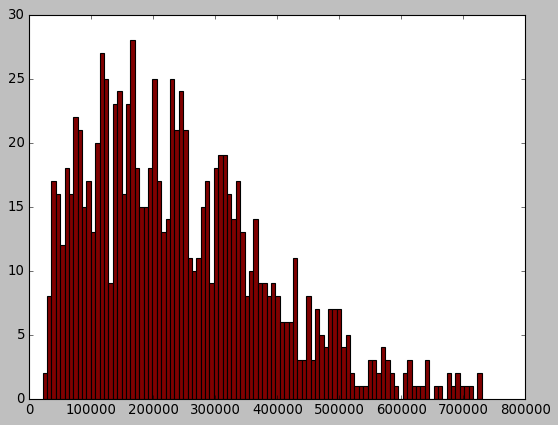

In [13]:
plt.hist(ergebnisse_heizwärmebedarf, color="maroon", bins=100)
plt.plot

### Versuch 2: Nur Fensterfläche random

In [232]:
# ergebnisse_heizwärmebedarf = []
ergebnisse = np.array([])
anzahl_versuche = 5000
for i in range(anzahl_versuche):
    geschossanzahl = 4
    geschosshöhe = 2.9
    gebäudelänge = 30
    gebäudebreite = 30
    wandfläche_nord_süd = gebäudelänge * geschosshöhe * geschossanzahl
    wandfläche_ost_west = gebäudebreite * geschosshöhe * geschossanzahl

    dach = Bilanz_5.Dach(name="Dach1", fläche=(gebäudebreite*gebäudelänge))
    wand1 = Bilanz_5.Außenwand("Wand1", (wandfläche_nord_süd),0)
    wand2 = Bilanz_5.Außenwand("Wand2", (wandfläche_ost_west),90)
    wand3 = Bilanz_5.Außenwand("Wand3", (wandfläche_nord_süd),180)
    wand4 = Bilanz_5.Außenwand("Wand4", (wandfläche_ost_west),270)
    fensterflächenanteil_nord = np.random.uniform(0.1,0.65)
    fensterflächenanteil_ost_west = np.random.uniform(0.1,0.65)
    fensterflächenanteil_süd = np.random.uniform(0.1,0.65)
    fst1 = Bilanz_5.Fenster("Fenster1", (wandfläche_nord_süd*fensterflächenanteil_nord), 0)
    fst2 = Bilanz_5.Fenster("Fenster2", (wandfläche_ost_west*fensterflächenanteil_ost_west), 90)
    fst3 = Bilanz_5.Fenster("Fenster3", (wandfläche_nord_süd*fensterflächenanteil_süd), 180)
    fst4 = Bilanz_5.Fenster("Fenster4", (wandfläche_ost_west*fensterflächenanteil_ost_west), 270)
    bpl = Bilanz_5.Bodenplatte("Bpl1", (gebäudebreite*gebäudelänge))
    
    Testprojekt = Bilanz_5.Monatsbilanz(wand1,wand2,wand3,wand4, dach, bpl, fst1,fst2,fst3,fst4,
                                        name="Testprojekt", geschossanzahl=geschossanzahl, 
                                        geschosshöhe=geschosshöhe, wärmebrückenzuschlag=0.05,
                                        luftwechsel=0.6, einfamilienhaus=False, schweresGebäude=True)
    
    Luftdichte, Innentemperatur, CwirkLuft, volumen, Cwirk, luftvolumen, nutzfläche, Hv = Testprojekt.konstanten_berechnen(bpl.fläche)
    bauteilliste, hüllfläche, a_v_verhältnis = Testprojekt.bauteilliste_erstellen()
    fensterliste = Testprojekt.fensterliste_erstellen()
    monatsbilanzierung = Testprojekt.monatsbilanzierung_erstellen()
    
    ergebnisse = np.append(ergebnisse, [monatsbilanzierung.loc["Heizwärmebedarf"].sum(),
                                        fst1.fläche, fst2.fläche, fst3.fläche, fst4.fläche, 
                                        fensterflächenanteil_nord, fensterflächenanteil_ost_west, fensterflächenanteil_süd
                                       ])

In [233]:
ergebnisse = ergebnisse.reshape(anzahl_versuche,8).round(1)
np.set_printoptions(suppress=True, precision=3)

In [234]:
# Ich möchte das ganze Array von der Variante, in der der Heizwärmebedarf am niedrigsten war
minimum = np.where (ergebnisse[:, 0] == ergebnisse[0:,0].min())
maximum = np.where (ergebnisse[:, 0] == ergebnisse[0:,0].max())
print (ergebnisse[minimum][0])
print (ergebnisse[maximum][0])

[47482.     37.3   219.9   223.2   219.9     0.1     0.6     0.6]
[77387.    142.5    34.9    37.4    34.9     0.4     0.1     0.1]


In [235]:
# Was is die höchste Fensterfläche im Süden und ist das die gleiche Variante mit dem geringsten Heizwärmebedarf?
maximum_fensterfläche_süd = np.where (ergebnisse[:, 3] == ergebnisse[0:,3].max())
print (ergebnisse[maximum_fensterfläche_süd][0]==ergebnisse[maximum][0]) # Nein, aber nah dran
print (ergebnisse[maximum_fensterfläche_süd][0])

[False False False False False False False False]
[50829.    161.5   125.7   226.1   125.7     0.5     0.4     0.6]


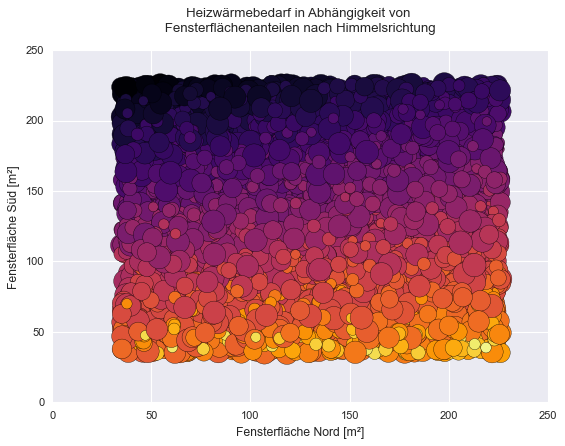

In [243]:
plt.scatter(ergebnisse[0:,1], ergebnisse[0:,3], s=(ergebnisse[0:,2]+ergebnisse[0:,4]), c=ergebnisse[0:,0],
            cmap="inferno", vmin=ergebnisse[minimum][0,0], vmax=ergebnisse[maximum][0,0], alpha=1)
plt.xlabel("Fensterfläche Nord [m²]")
plt.ylabel("Fensterfläche Süd [m²]")
plt.title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteilen nach Himmelsrichtung \n")
plt.show()

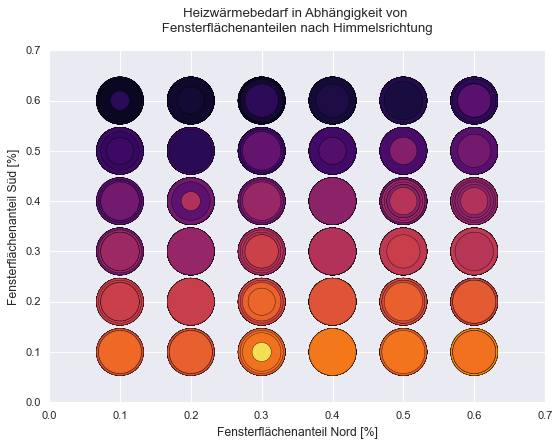

In [240]:
plt.scatter(ergebnisse[:,5], ergebnisse[:,7], s=ergebnisse[:,6]*3000, c=ergebnisse[:,0],
            cmap="inferno", alpha=1)
plt.xlabel("Fensterflächenanteil Nord [%]")
plt.ylabel("Fensterflächenanteil Süd [%]")
plt.title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteilen nach Himmelsrichtung \n")
plt.show()

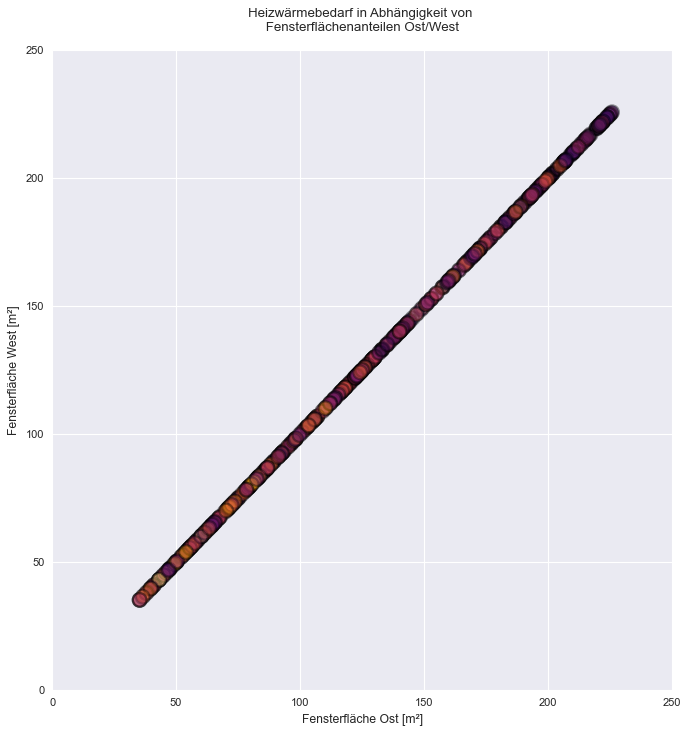

In [217]:
# Da nun die Fenster Ost- und West gleich groß sind, ist diese Abbildung unspektakulär
plt.figure (figsize=(10,10))
plt.scatter(ergebnisse[:,2], ergebnisse[:,4], c=ergebnisse[:,0],
            cmap="inferno", alpha=0.4, lw=2, s=150) # Dunkler ist niedrigerer Bedarf
plt.xlabel("Fensterfläche Ost [m²]")
plt.ylabel("Fensterfläche West [m²]")
plt.title("Heizwärmebedarf in Abhängigkeit von \n Fensterflächenanteilen Ost/West \n")
plt.show()

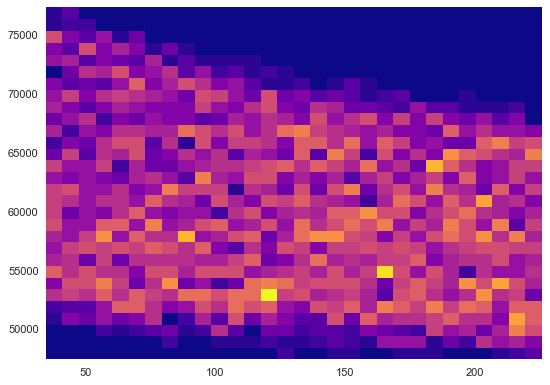

In [238]:
plt.hist2d(ergebnisse[0:,4], ergebnisse[0:,0],cmap="plasma", bins=30)
plt.show()